In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import scipy as sci
import time

In [2]:
##Parâmetros do problema####
X0=30
K=28
T=40/252  #fração do ano em dia útil
r=0.035
delta=0.01
mu=0.045
sigma=0.25


In [3]:
######Solucao BMS#####
t=0
tau=T-t

d1= (np.log(X0/K) + ((r-delta) +(0.5*np.power(sigma,2)))*tau)/(sigma*np.sqrt(tau))
d2= d1 -sigma*np.sqrt(tau)

va= K*np.exp(-r*tau)*sci.stats.norm.cdf(-d2) - X0*np.exp(-delta*tau)*sci.stats.norm.cdf(-d1)
print(va)

0.38854527561940966


In [5]:
###Funcao da Simulacao de Monte Carlo####
def simulacao(i):
    np.random.seed(20)
    v_mc=[]
    start=time.time()
    for i in range(i):
        x=X0*np.exp(((r-delta)-0.5*sigma**2)*tau + sigma*np.sqrt(tau)*np.random.normal(0,1))
        v=np.exp(-r*tau)*np.maximum(K-x,0)
        v_mc.append(v)
    
    #valor da opção por simulação
    vn=np.mean(v_mc)
    #medida de erro 
    erro= 100*np.absolute(va-vn)/va
    #tempo de cpu
    cpu=  time.time() - start
    ## Intervalo de confiança
    se= np.std(v_mc)/np.sqrt(len(v_mc))
    ic=se*sci.stats.t.ppf((1+0.95)/2,len(v_mc)-1)
    
    return[len(v_mc),va,vn,erro,cpu,vn+ic,vn-ic]


In [6]:
#####Loop para todas as simulacoes#####
numero=[]
valorana=[]
valornum=[]
erro_perc=[]
tempo_cpu=[]
ic_superior=[]
ic_inferior=[]
for j in [1000,2000,5000,10000,50000,100000]:
    solucao=simulacao(j)
    numero.append(solucao[0])
    valorana.append(solucao[1])
    valornum.append(solucao[2])
    erro_perc.append(solucao[3])
    tempo_cpu.append(solucao[4])
    ic_superior.append(solucao[5])
    ic_inferior.append(solucao[6])

    
                    


In [7]:
#####Datframe para a Analise
df=pd.DataFrame(numero)
df.columns=['N_Final']
df['Valor_Analitico']=valorana
df['Valor_Numerico']=valornum
df['Medida_Erro']=erro_perc
df['Tempo_CPU']=tempo_cpu
df['IC_Superior']=ic_superior
df['IC_Inferior']=ic_inferior
df


,N_Final,Valor_Analitico,Valor_Numerico,Medida_Erro,Tempo_CPU,IC_Superior,IC_Inferior
0,1000,0.388545,0.383462,1.308238,0.030380,0.438129,0.328795
1,2000,0.388545,0.387694,0.219080,0.056593,0.427675,0.347713
2,5000,0.388545,0.384018,1.165265,0.090043,0.408998,0.359037
3,10000,0.388545,0.378807,2.506257,0.207069,0.396567,0.361048
4,50000,0.388545,0.390416,0.481435,1.034850,0.398500,0.382331
5,100000,0.388545,0.386218,0.598922,1.922116,0.391898,0.380539


[]

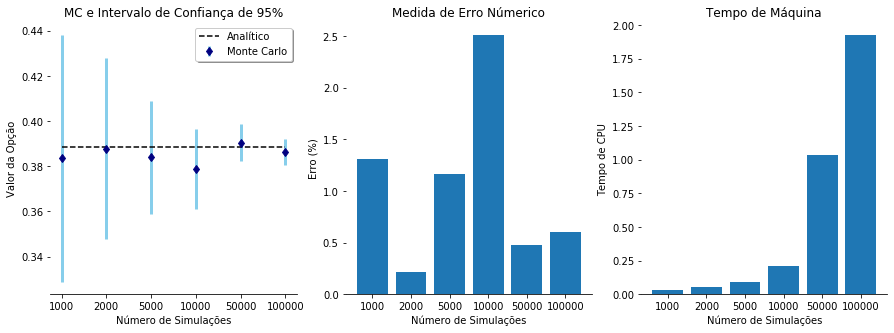

In [9]:
#####Figuras finais da Lista#####
fig, (ax1,ax2,ax3)= plt.subplots(1,3, figsize=(15,5))
sns.despine(left=True)

ax1.plot(df.index, df.Valor_Analitico, color='black', ls='--' )
ax1.errorbar(df.index,df.Valor_Numerico, yerr=df.IC_Superior-df.Valor_Numerico, fmt='d', color='navy',
             ecolor='skyblue', elinewidth=3, capsize=0)
ax1.legend(('Analítico', 'Monte Carlo'), loc='upper right', shadow=True)
ax1.set_xlabel('Número de Simulações')
ax1.set_ylabel('Valor da Opção')
ax1.set_xticklabels([0,1000,2000,5000,10000,50000,100000])
ax1.set_title('MC e Intervalo de Confiança de 95%')

ax2.bar(df.index, df.Medida_Erro)
ax2.set_xlabel('Número de Simulações')
ax2.set_ylabel('Erro (%)')
ax2.set_xticklabels([0,1000,2000,5000,10000,50000,100000])
ax2.set_title('Medida de Erro Númerico')

ax3.bar(df.index,df.Tempo_CPU)
ax3.set_xlabel('Número de Simulações')
ax3.set_ylabel('Tempo de CPU')
ax3.set_xticklabels([0,1000,2000,5000,10000,50000,100000])
ax3.set_title('Tempo de Máquina')



plt.plot()